# Exercise 04:  Non-Linear-Optimization Circle
**Objectives of the lesson:**

1. Given Data Points & Circle-Parameters
2. Residuum Calculation
3. Jacobi Matrix Calculation
4. Gauss-Newton Optimization Calculation 
6. Plotting Optimization Results

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Given Data points & Circle-Parameters 

In [2]:
# datapoints: (1, 7), (2, 6), (5, 8), (7, 7), (9, 5), (3, 7)
circle_points = np.array([[1, 7],
                          [2, 6],
                          [5, 8],
                          [7, 7],
                          [9, 5],
                          [3, 7]])

# cirlce parameters = (z1, z2, r) = (5.3794, 7.2532, 3.0370)
circle_parameters = np.array([[5.3794], [7.2532], [3.0370]])

## 2. Residuum Calculation
**Dimensions of Residuum Vector:** <br>
nx1<br>
n : count of data points

In [3]:
def res_func(cpo, cpa):
    # optimization function f(z1, z2, r) = r - sqrt((z1-xi)^2 + (z2 - yi)^2), xi & yi are circle_points
    
    # shaping corresponding residuum container, number of residuum rows  == number of counted datapoints
    residuum = np.zeros((cpo.shape[0], 1))

    index = 0 

    # calculating residuum container for i given datapoints
    for i in cpo:
        residuum[index] = cpa[2] - np.sqrt(np.square(cpa[0] - i[0]) + np.square(cpa[1] - i[1]))
        index = index +1
        
    return residuum

## 3. Jacobi Matrix Calculation
**Dimensions of Residuum Vector:** <br>
nxm <br>
n : count of data points <br>
m : count of parameters Residuum-Function

In [4]:
# derivation r : f = 1
# derivation z1: f = (z1 - x1) / sqrt((z1-x1)^2 + (z2 - x2)^2)
# derivation z2: f = (z2 - x2) / sqrt((z1-x1)^2 + (z2 - x2)^2)

def jacobi_matrix(cpo,cpa):
    
    # shaping corresponding jacobi matrix
    # number of jacobi matrix rows  == number of counted datapoints
    # number of jacobi matrix columns  == number of counted circle parameters
    jacobi = np.zeros((cpo.shape[0], cpa.shape[0]))

    index = 0

    # calculating jacobi matrix row-wise for every given datapoint
    for i in cpo:
        jacobi[index][0] = - (cpa[0] - i[0]) / np.sqrt(np.square(cpa[0] - i[0]) + np.square(cpa[1] - i[1]))
        jacobi[index][1] = - (cpa[1] - i[1]) / np.sqrt(np.square(cpa[0] - i[0]) + np.square(cpa[1] - i[1]))
        jacobi[index][2] = 1
        index = index +1

    return jacobi

## 4. Gauss-Newton Optimization Calculation 
**Gauss-Newton Optimization:**<br>
parameters = parameters - (jacobi_matrix ^-1) * residuum-vector <br>
parameters : given parameters at the beginning, not data points!

Optimized Circle Parameters: 
 [[4.73978241]
 [2.9835327 ]
 [4.71422604]]
Final Error Value: 
 1.1079707027641381
Optimized Circle:


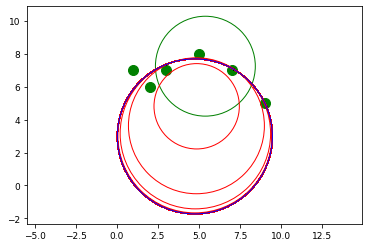

In [5]:
max_iterations = 1000
epsilon = 0.41

#plot circle parameters - first optimization green
circle = plt.Circle((circle_parameters[0],  circle_parameters[1]), circle_parameters[2], fc='none', ec='g')
plt.gca().add_patch(circle)

for i in range(max_iterations):
    
    # calculate residuum vector
    res = res_func(circle_points, circle_parameters)
    # calculate jacobi matrix
    jac = jacobi_matrix(circle_points, circle_parameters)
    # More-Penrose inverse of jacobi matrix
    j_plus = np.dot(np.linalg.inv(np.dot(np.transpose(jac), jac)), np.transpose(jac))
    # update circle parameters - Gauss-Newton
    circle_parameters = circle_parameters - np.dot(j_plus, res)
    #plot cirlce parameters - during optimization red
    circle = plt.Circle((circle_parameters[0],  circle_parameters[1]), circle_parameters[2], fc='none', ec='r')
    plt.gca().add_patch(circle)
    # epsilon break
    if np.linalg.norm(res) < epsilon:
            break
    
print("Optimized Circle Parameters: \n", circle_parameters)
print("Final Error Value: \n", np.linalg.norm(res))

#plot cirlce parameters - final optimization blue
circle = plt.Circle((circle_parameters[0],  circle_parameters[1]), circle_parameters[2], fc='none', ec='b')
plt.gca().add_patch(circle)

for i in range(np.shape(circle_points)[0]):
    plt.scatter(circle_points[i][0], circle_points[i][1], s=100, facecolors='g', edgecolors='g')
    
# Schaubild anzeigen
print("Optimized Circle:")
plt.tick_params(axis='both', which='major', labelsize=9)
plt.ylim(-10, 10)
plt.xlim(-10, 10)
plt.axis('equal')
plt.show()

## 5. Plotting Optimization Results

Data Points:
( 1 , 7 )
( 2 , 6 )
( 5 , 8 )
( 7 , 7 )
( 9 , 5 )
( 3 , 7 )
Optimized Circle:


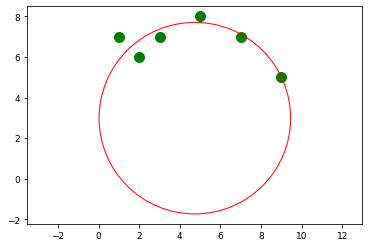

In [6]:
# plot cirlce with calculated parameters
circle = plt.Circle((circle_parameters[0],  circle_parameters[1]), circle_parameters[2], fc='none', ec='r')
plt.gca().add_patch(circle)

# print data points
print("Data Points:")
for i in range(np.shape(circle_points)[0]):
    print("(" , circle_points[i][0] , "," , circle_points[i][1] , ")")
#plot data points
for i in range(np.shape(circle_points)[0]):
    plt.scatter(circle_points[i][0], circle_points[i][1], s=100, facecolors='g', edgecolors='g')
    
# plot settings
print("Optimized Circle:")
plt.tick_params(axis='both', which='major', labelsize=9)
plt.ylim(-10, 10)
plt.xlim(-10, 10)
plt.axis('equal')
plt.show()